In [1]:
# imporuję bibliotekę pandas, ponieważ będę używała dostępnych w niej metod do czyszczenia danych 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# wczytuję plik z danymi do tabeli z danymi, ustawiając w argumentach, że plik tennie zawiera nagłówka z nazwami kolumn,
# a tam gdzie są znaki zapytania lub wartości -9.0 ma zamienić na NaN (null values)
df = pd.read_csv('processed.switzerland.data', header=None,  na_values =["?", -9.0])

In [3]:
# wywołuję tabelę aby zobaczyć mniej więcej jak teraz wygląda
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.0,0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
119,70,1,4,140.0,0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
120,72,1,3,160.0,0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
121,73,0,3,160.0,0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


In [4]:
# sprawdzam wymiary tablicy
df.shape

(123, 14)

In [5]:
# Tworzę słownik, w którym kluczem są indeksy kolumn, a wartości to nazwy odpowiednich kolumn
headers = {0 : "age",
               1 : "sex",
               2 : "cp",
               3 : "trestbps",
               4 : "chol",
               5 : "fbs",
               6 : "restecg",
               7 : "thalach",
               8 : "exang",
               9 : "oldpeak",
               10 : "slope",
               11 : "ca",
               12 : "thal",
               13 : "diagnosis"}

In [6]:
# Dodaję nazwy tych kolumn jako nagłówki do tabeli
df = df.rename(columns=headers)

In [7]:
# Sprawdzam, czy operacja wykonała się prawidłowo
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2


In [8]:
# Zwracam sobie opis zawartości tabeli. 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,123.000000,123.000000,123.000000,121.000000,123.0,48.000000,122.000000,122.000000,122.000000,117.000000,106.000000,5.000000,71.000000,123.000000
mean,55.317073,0.918699,3.699187,130.206612,0.0,0.104167,0.360656,121.557377,0.442623,0.653846,1.801887,1.600000,5.788732,1.804878
std,9.032108,0.274414,0.688726,22.559151,0.0,0.308709,0.590077,25.977438,0.498745,1.056061,0.623658,0.547723,1.731354,1.013503
min,32.000000,0.000000,1.000000,80.000000,0.0,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,1.000000,3.000000,0.000000
25%,51.000000,1.000000,4.000000,115.000000,0.0,0.000000,0.000000,104.250000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,0.000000,0.000000,121.000000,0.000000,0.300000,2.000000,2.000000,7.000000,2.000000
75%,61.500000,1.000000,4.000000,145.000000,0.0,0.000000,1.000000,140.000000,1.000000,1.500000,2.000000,2.000000,7.000000,3.000000
max,74.000000,1.000000,4.000000,200.000000,0.0,1.000000,2.000000,182.000000,1.000000,3.700000,3.000000,2.000000,7.000000,4.000000


In [9]:
# Dostaję informacje o typie danych zawartych w tym zbiorze danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        123 non-null    int64  
 1   sex        123 non-null    int64  
 2   cp         123 non-null    int64  
 3   trestbps   121 non-null    float64
 4   chol       123 non-null    int64  
 5   fbs        48 non-null     float64
 6   restecg    122 non-null    float64
 7   thalach    122 non-null    float64
 8   exang      122 non-null    float64
 9   oldpeak    117 non-null    float64
 10  slope      106 non-null    float64
 11  ca         5 non-null      float64
 12  thal       71 non-null     float64
 13  diagnosis  123 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 13.6 KB


In [10]:
# Sprawdzam czy są duplikaty
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
118    False
119    False
120    False
121    False
122    False
Length: 123, dtype: bool

In [11]:
# sumuję dla każdej kolumny ilość brakujących wartości
print(df.isnull().sum())

age            0
sex            0
cp             0
trestbps       2
chol           0
fbs           75
restecg        1
thalach        1
exang          1
oldpeak        6
slope         17
ca           118
thal          52
diagnosis      0
dtype: int64


In [12]:
# uzupełniam te wartości średnią 
df = df.fillna(df.mean())
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,32,1,1,95.000000,0,0.104167,0.000000,127.0,0.0,0.700000,1.000000,1.6,5.788732,1
1,34,1,4,115.000000,0,0.104167,0.360656,154.0,0.0,0.200000,1.000000,1.6,5.788732,1
2,35,1,4,130.206612,0,0.104167,0.000000,130.0,1.0,0.653846,1.801887,1.6,7.000000,3
3,36,1,4,110.000000,0,0.104167,0.000000,125.0,1.0,1.000000,2.000000,1.6,6.000000,1
4,38,0,4,105.000000,0,0.104167,0.000000,166.0,0.0,2.800000,1.000000,1.6,5.788732,2


In [13]:
# Użyłabym tego, gdyby w zbiorze danych były obecne duplikaty
# df = df.drop_duplicates()

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,32,1,1,95.000000,0,0.104167,0.000000,127.0,0.0,0.700000,1.000000,1.6,5.788732,1
1,34,1,4,115.000000,0,0.104167,0.360656,154.0,0.0,0.200000,1.000000,1.6,5.788732,1
2,35,1,4,130.206612,0,0.104167,0.000000,130.0,1.0,0.653846,1.801887,1.6,7.000000,3
3,36,1,4,110.000000,0,0.104167,0.000000,125.0,1.0,1.000000,2.000000,1.6,6.000000,1
4,38,0,4,105.000000,0,0.104167,0.000000,166.0,0.0,2.800000,1.000000,1.6,5.788732,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115.000000,0,0.000000,1.000000,92.0,1.0,0.000000,2.000000,1.6,7.000000,1
119,70,1,4,140.000000,0,1.000000,0.000000,157.0,1.0,2.000000,2.000000,1.6,7.000000,3
120,72,1,3,160.000000,0,0.104167,2.000000,114.0,0.0,1.600000,2.000000,2.0,5.788732,0
121,73,0,3,160.000000,0,0.000000,1.000000,121.0,0.0,0.000000,1.000000,1.6,3.000000,1


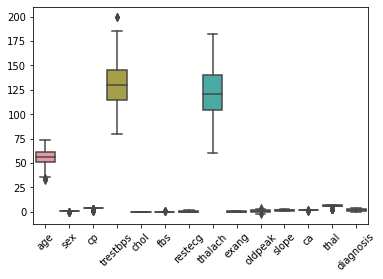

In [15]:
# stowrzenie wykresu aby zwizualizować wartości odchylenia standardowego. 
# Jak widać dużo jest wartości skrajnych, większość z nich według opisu danych nie powinna być typu liczbowego, 
# jednakże w użytym tu pliku nie są symboliczne a liczbowe.
ax = sns.boxplot(data=df)
ax.set_xticklabels(labels=df.columns, rotation = 45)

# Obliczamy Z-score dla każdej wartości 
z_scores = (df - df.mean()) / df.std()

# Rozpoznajemy i usuwamy wartości skrajne
# df = df[(z_scores < 3).all(axis=1)]


In [16]:
# Tego polecenia należy użyć jeśli są wartości oznaczone symbolami a nie liczbami, 
# metoda get_dummies konwertuje zmienną kategoryczną na zmienną fikcyjną/wskaźnikową

# df = pd.get_dummies(data, columns=['sex', 'cp','chol', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']) 